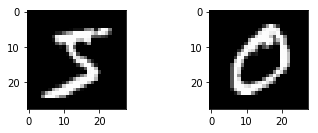

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2784 - acc: 0.9211 - val_loss: 0.1412 - val_acc: 0.9572
Epoch 2/10
 - 6s - loss: 0.1115 - acc: 0.9676 - val_loss: 0.0920 - val_acc: 0.9705
Epoch 3/10
 - 6s - loss: 0.0718 - acc: 0.9796 - val_loss: 0.0781 - val_acc: 0.9771
Epoch 4/10
 - 6s - loss: 0.0504 - acc: 0.9856 - val_loss: 0.0746 - val_acc: 0.9768
Epoch 5/10
 - 6s - loss: 0.0372 - acc: 0.9894 - val_loss: 0.0676 - val_acc: 0.9787
Epoch 6/10
 - 6s - loss: 0.0268 - acc: 0.9925 - val_loss: 0.0613 - val_acc: 0.9807
Epoch 7/10
 - 6s - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0625 - val_acc: 0.9807
Epoch 8/10
 - 6s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0613 - val_acc: 0.9807
Epoch 9/10
 - 6s - loss: 0.0106 - acc: 0.9978 - val_loss: 0.0584 - val_acc: 0.9809
Epoch 10/10
 - 6s - loss: 0.0077 - acc: 0.9985 - val_loss: 0.0586 - val_acc: 0.9813
Baseline Error: 1.87%


In [22]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))

plt.show()

#Using a simple neural network, get an error of less than 1.75 %
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

#fix random seed for reproducibility
seed = 7
np.random.seed(seed)

#Now we flatten 28*28 images to a 784 vector for each image.
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#Now normalise input, to reduce range from 0 to 255 to 0 to 1
X_train = X_train/255
X_test = X_test/255

#It is good practice to one hot encoding of class values, from 0 to 9 to a dummy binary matrix -- remember categorical data -- Kirill Eremeneko
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#Now we create a simple neural network model.
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

#Now we build the model
model = baseline_model()

#Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)

#Final model evaluation
scores = model.evaluate(X_test, y_test, verbose = 0)
print "Baseline Error: %.2f%%" %(100-scores[1]*100)

## So we see that a simple neural network was able to sustain at a baseline error of 1.88%. This accuracy is pretty good considering we only used a single dense layer.